https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# EDA

In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df['cardio'].unique()

array([0, 1], dtype=int64)

# Feature Engineering

In [7]:
df.drop(['id'],axis=1,inplace=True)

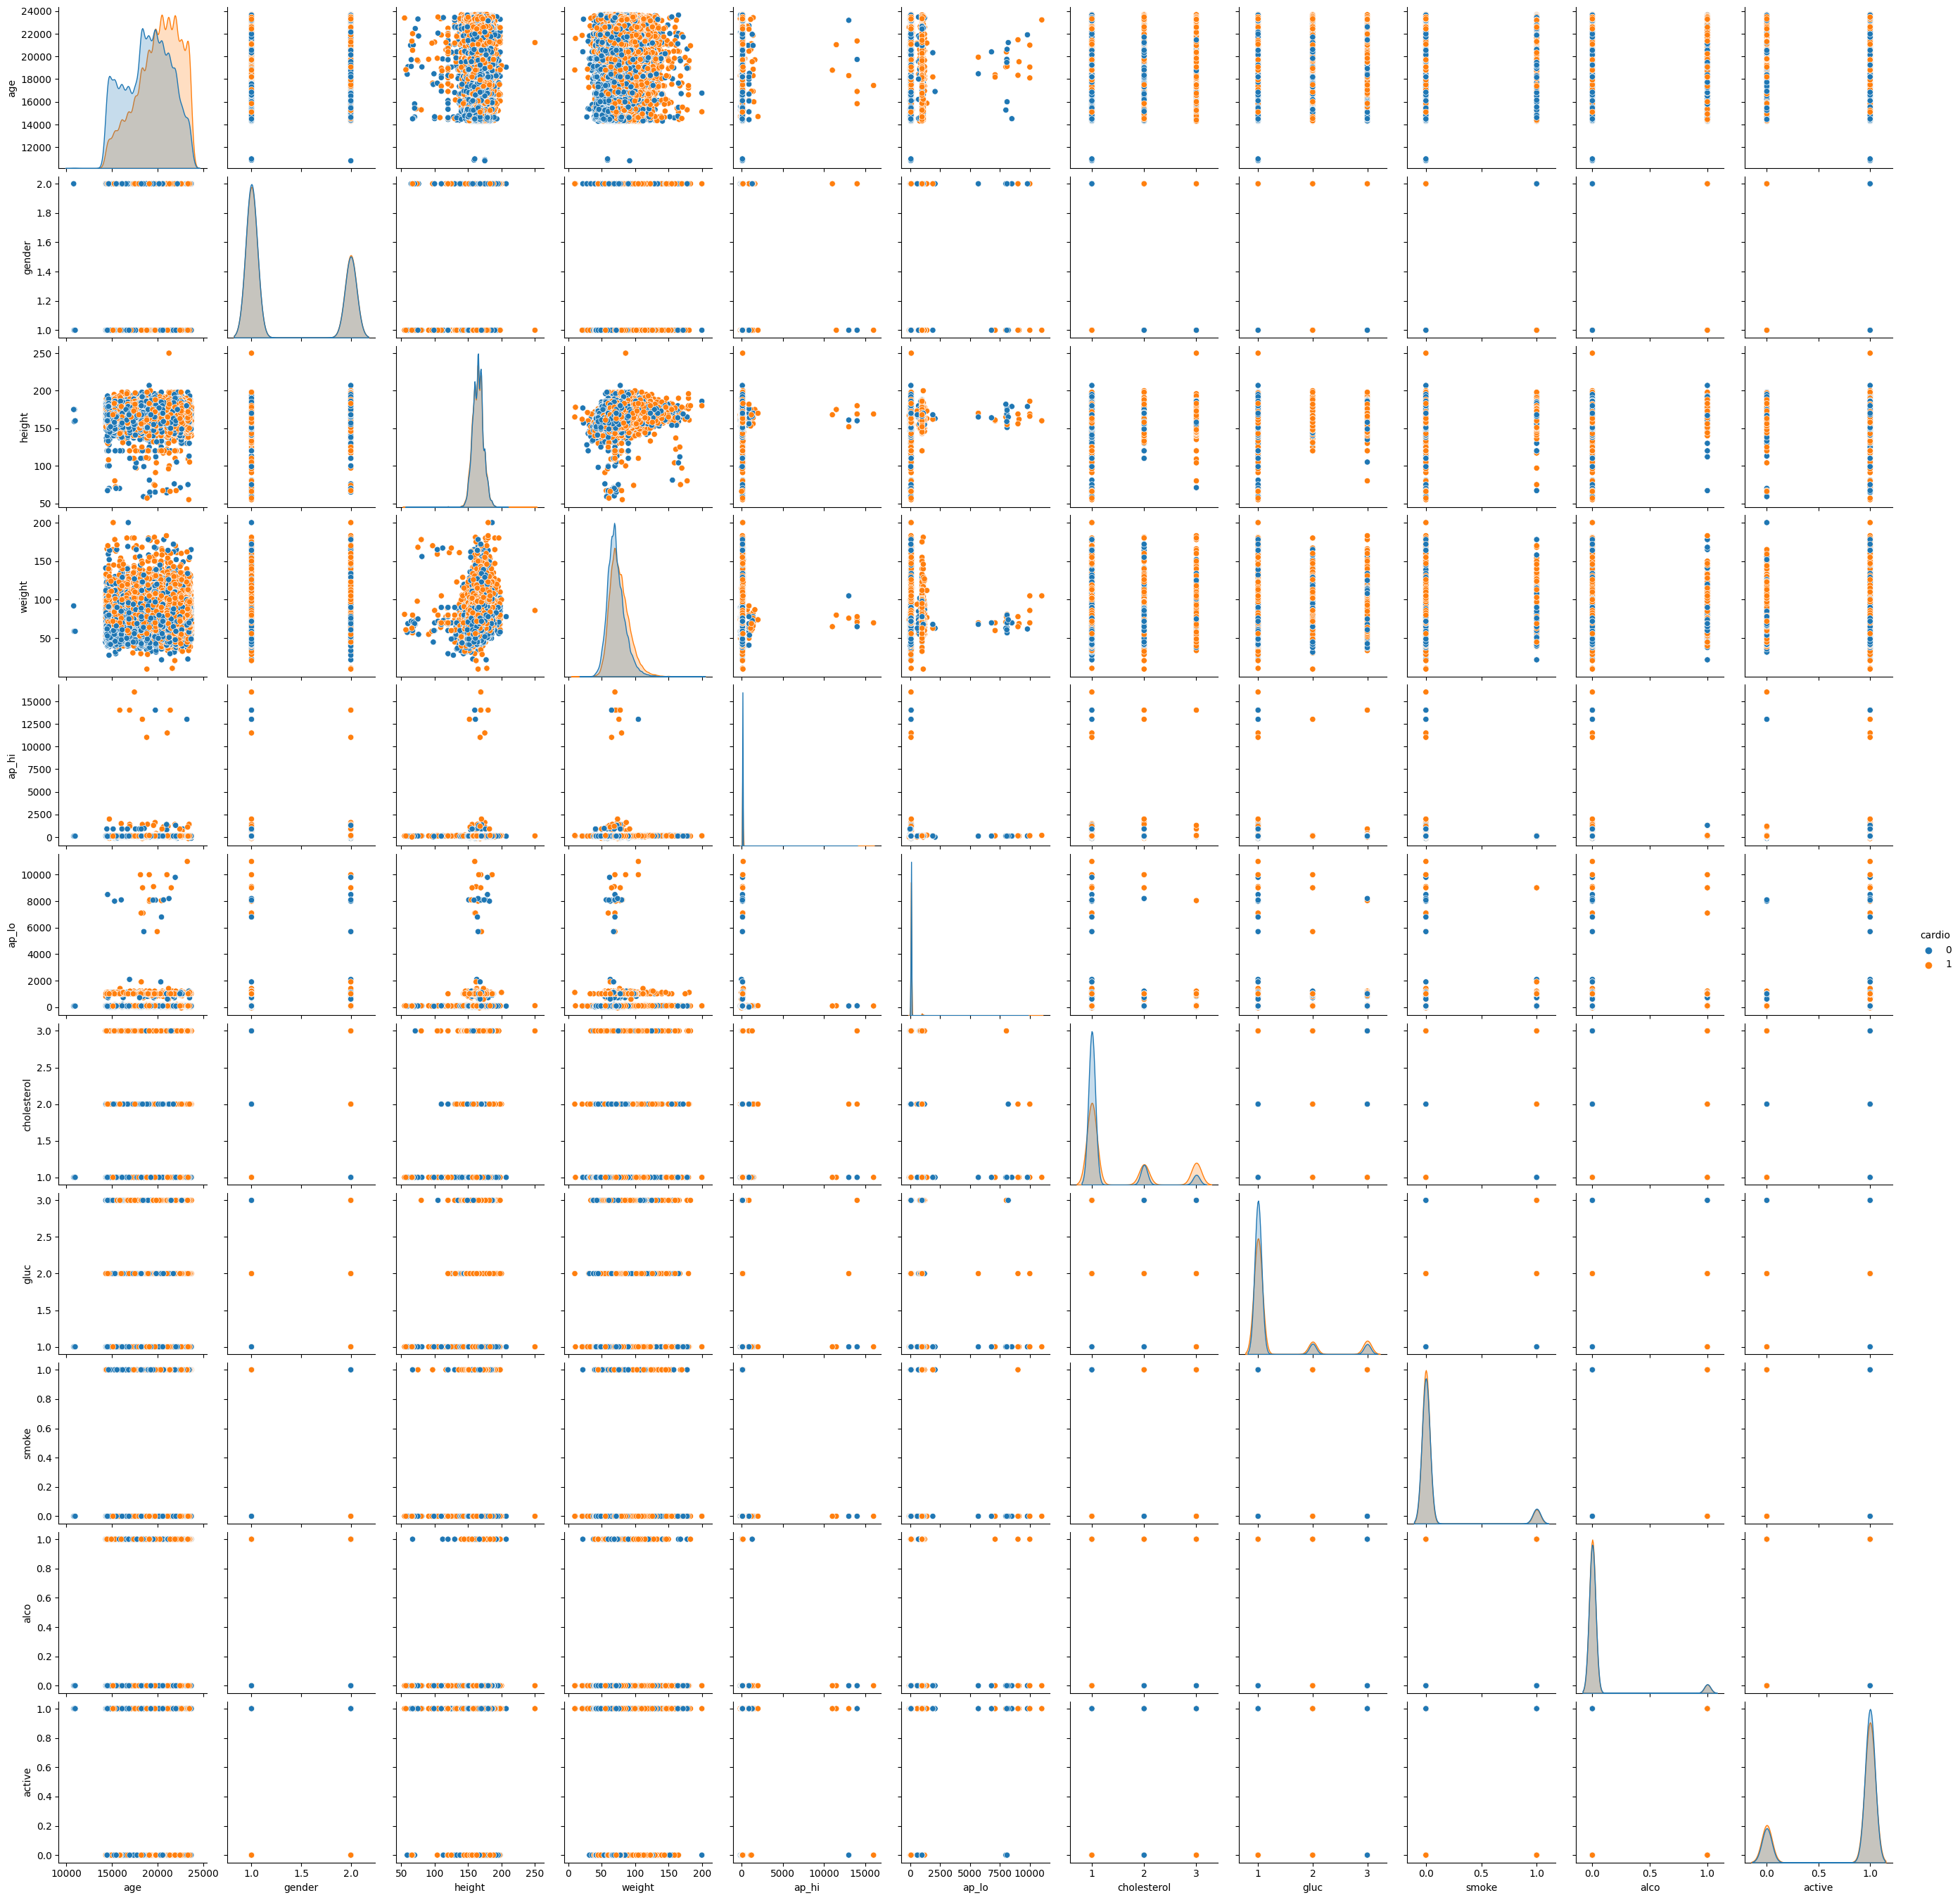

In [8]:
sns.pairplot(df,hue='cardio')

# Spliting data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=df.drop(['cardio'],axis=1)
y=df['cardio']

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape

(56000, 11)

In [13]:
x_test.shape

(14000, 11)

In [14]:
y_train.shape

(56000,)

In [15]:
y_test.shape

(14000,)

**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred , y_test))

0.6280714285714286


**KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)
pred = knn.predict(x_test)
print(accuracy_score(pred , y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6820714285714286


**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)
pred = log_reg.predict(x_test)
print(accuracy_score(pred , y_test))

0.6981428571428572


**Xgboost**

In [22]:
import xgboost

In [23]:
xg = xgboost.XGBClassifier()
xg.fit(x_train , y_train)
pred =xg.predict(x_test)
print(accuracy_score(pred,y_test))

0.7352857142857143


# XGBoost Hyper parameter tuning using GridSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
params ={
    'eta':[0.01,0.1,1.0,0.2,0.25,0.5,0.3],
    'max_depth':[3,5,7,10,12,15,17,20],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.01,0.1,1.0,0.3,0.5]
}

In [26]:
xg = xgboost.XGBClassifier()

In [27]:
rs_xg = RandomizedSearchCV(xg, param_distributions=params , cv=5,verbose=3,scoring='accuracy',n_jobs=-1,n_iter=100)

In [28]:
rs_xg.fit(x_train , y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [31]:
print(rs_xg.best_params_)

{'min_child_weight': 7, 'max_depth': 5, 'gamma': 0.3, 'eta': 0.25}


In [32]:
print(rs_xg.best_score_)

0.7355357142857144
